# Documentation
This script is developed for analyzing data from reward project.

In [79]:
from zfish.utils import *
from zfish.local_path import *
from zfish._io import import12chFlt

code_id = "5001 - Linear Track Swim Speed"
loc = join(figpath, code_id)
mkdir(loc)
f_formal = pd.read_excel(r"D:\EnData\Reward\Experiment Records.xlsx", sheet_name='formal')
pass

        D:\Yao Shuyang\En Lab\Results\5001 - Linear Track Swim Speed is already existed!


# Example Session for Go-Dark-Go

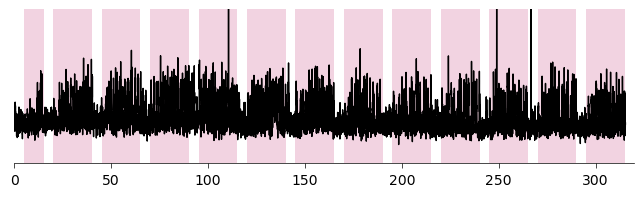

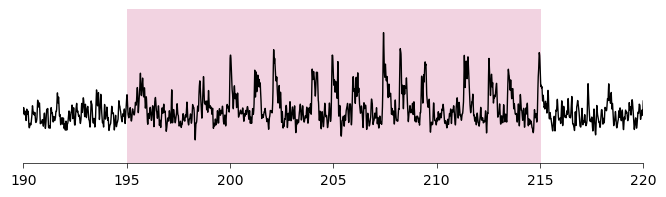

In [80]:
def read_and_process(dir_name: str, ylims = None, xlims = None, file_name="Example_Full_GoDarkGo"):
    data = import12chFlt(dir_name)
    
    ch0 = data['fltCh0']
    ch1 = data['fltCh1']
    
    x = np.linspace(-300, 300, 601)
    sigma = 100
    gkernel = np.exp(-0.5 * (x / sigma) ** 2)
    gkernel /= gkernel.sum()
    
    ch0_smoothed = np.convolve(ch0, gkernel, mode='same')
    ch1_smoothed = np.convolve(ch1, gkernel, mode='same')
    t = data['behav_time']

    fig = plt.figure(figsize=(8, 2))
    ax = Clear_Axes(plt.axes(), close_spines=['top', 'right', 'left'], ifxticks=True)
    if xlims is not None:
        idx = np.where((t[600:-600] > xlims[0]) & (t[600:-600] < xlims[1]))[0]
    else:
        idx = np.arange(len(t)-1200)
    ax.plot(t[600:-600][idx], (ch0_smoothed[600:-600] + ch1_smoothed[600:-600])[idx] / 2, c='k', lw=1)
    xpos = data['behav_pos']
    xlabels = np.where(xpos < 0.5, 0, 1)
    dxlabel = np.ediff1d(xlabels)
    switch_times = np.concatenate([[0], np.where(dxlabel != 0)[0]+1, [len(xlabels)]])
    for i in range(len(switch_times)-1):
        start_idx = switch_times[i]
        end_idx = switch_times[i+1]
        if xlabels[start_idx] == 0:
            if xlims is not None:
                if (t[start_idx] > xlims[1]) or (t[end_idx] < xlims[0]):
                    continue
                
            if ylims is not None:
                ax.fill_betweenx(ylims, t[start_idx], t[end_idx], color='#d56e9e', alpha=0.3, edgecolor=None)
            else:
                ax.fill_betweenx(ax.get_ylim(), t[start_idx], t[end_idx], color='#d56e9e', alpha=0.3, edgecolor=None)

    if ylims is not None:
        ax.set_ylim(ylims)
    if xlims is not None:
        ax.set_xlim(xlims)
    plt.savefig(join(loc, f"{file_name}.png"), dpi=600)
    plt.savefig(join(loc, f"{file_name}.svg"), dpi=600)
    plt.show()

read_and_process(f_formal['Ephys path'][58], ylims=(0.00002, 0.00012), xlims=(0, 320), file_name="Example_Full_GoDarkGo")
read_and_process(f_formal['Ephys path'][58], ylims=(0.00002, 0.00010), xlims=(190, 220), file_name="Example_Full_GoDarkGo [Zoomed]")

In [2]:
mkdir(join(loc, "GoDarkGo"))

def process_data(res):
    data = {}
    for k in res.keys():
        data[k] = res[k][::120]
    return data

def visualize_godarkgo(fishID: int, ff: pd.DataFrame = f_formal):
    idx = np.where((ff['ID'] == fishID) & (ff['session'] <= 4))[0]
    
    res = import12chFlt(ff['Ephys path'][idx[0]])
    data = process_data(res)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 4))
    ax0 = Clear_Axes(axes[0], close_spines=['top', 'right', 'left'], ifxticks=True)
    ax1 = Clear_Axes(axes[1], close_spines=['top', 'right', 'left'], ifxticks=True)
    x = data['behav_pos'][25:-25]
    x[x < 0.5] = 0
    signal0 = np.convolve(data['fltCh0'], np.ones(20)/20, mode='same')[25:-25]
    signal1 = np.convolve(data['fltCh1'], np.ones(20)/20, mode='same')[25:-25]
    vmax = np.min([np.max(signal0), np.max(signal1)])
    
    ax0.plot(data['behav_time'][25:-25], signal0, c='#d56e9e', lw=1)
    ax0.plot(data['behav_time'][25:-25], -signal1, c='#3c619a', lw=1)
    axt0 = Clear_Axes(ax0.twinx(), close_spines=['top', 'right', 'left'], ifxticks=True)
    axt0.plot(data['behav_time'][25:-25], x, c='k', lw=1)
    axt0.set_ylim(-0.5, 1)
    ax0.set_ylim(-vmax, vmax)
    ax0.set_xlim(0, ax0.get_xlim()[1])
    
    res = import12chFlt(ff['Ephys path'][idx[-1]])
    data = process_data(res)
    x = data['behav_pos'][25:-25]
    x[x < 0.5] = 0
    signal0 = np.convolve(data['fltCh0'], np.ones(20)/20, mode='same')[25:-25]
    signal1 = np.convolve(data['fltCh1'], np.ones(20)/20, mode='same')[25:-25]
    vmax = np.min([np.nanmax(signal0), np.nanmax(signal1)])
    ax1.plot(data['behav_time'][25:-25], signal0, c='#d56e9e', lw=1)
    ax1.plot(data['behav_time'][25:-25], -signal1, c='#3c619a', lw=1)
    axt1 = Clear_Axes(ax1.twinx(), close_spines=['top', 'right', 'left'], ifxticks=True)
    axt1.plot(data['behav_time'][25:-25], x, c='k', lw=1)
    axt1.set_ylim(-0.5, 1)
    ax1.set_ylim(-vmax, vmax)
    ax1.set_xlim(0, ax1.get_xlim()[1])
    plt.suptitle(f"Fish {fishID}")
    ax1.set_xlabel("Time (s)")
    plt.savefig(join(loc, "GoDarkGo", f"{fishID}_SwimPower.png"), dpi=600)
    plt.savefig(join(loc, "GoDarkGo", f"{fishID}_SwimPower.svg"), dpi=600)
    plt.show()

"""
for fishID in np.unique(f_formal['ID']):
    visualize(fishID)
"""

        D:\Yao Shuyang\En Lab\Results\5001 - Linear Track Swim Speed\GoDarkGo is already existed!


"\nfor fishID in np.unique(f_formal['ID']):\n    visualize(fishID)\n"

# For Passive Navigation

        D:\Yao Shuyang\En Lab\Results\5001 - Linear Track Swim Speed\Open-loop is already existed!


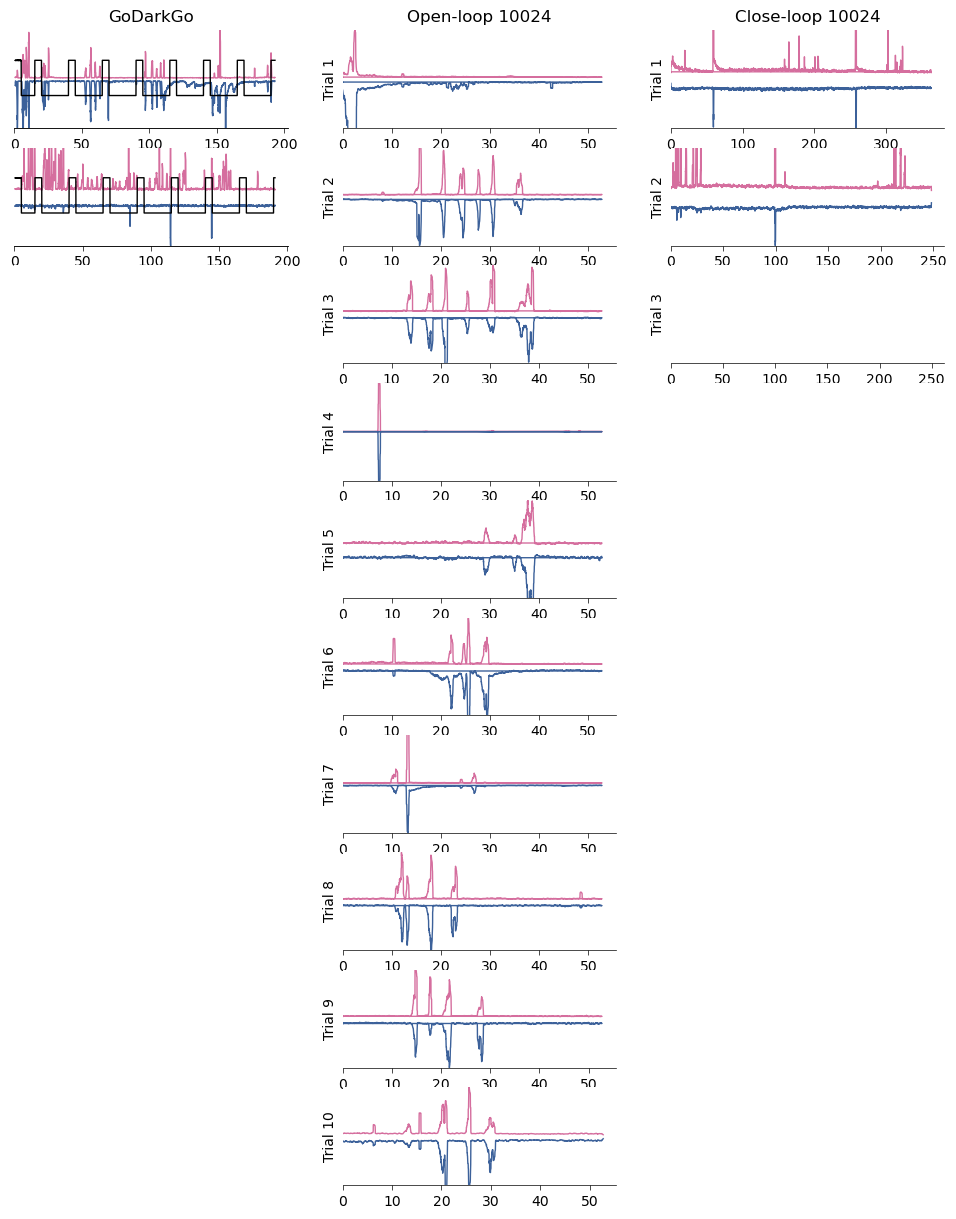

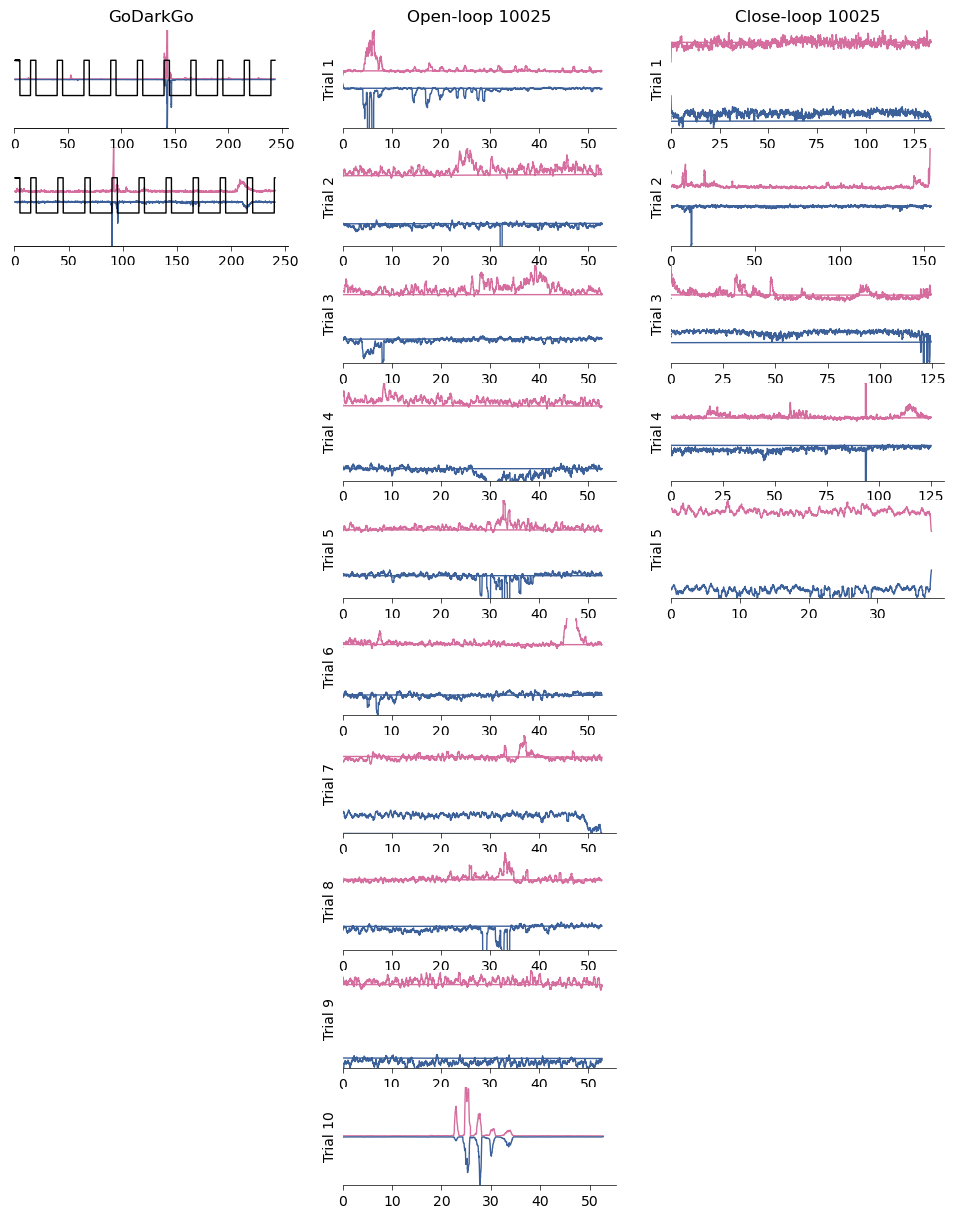

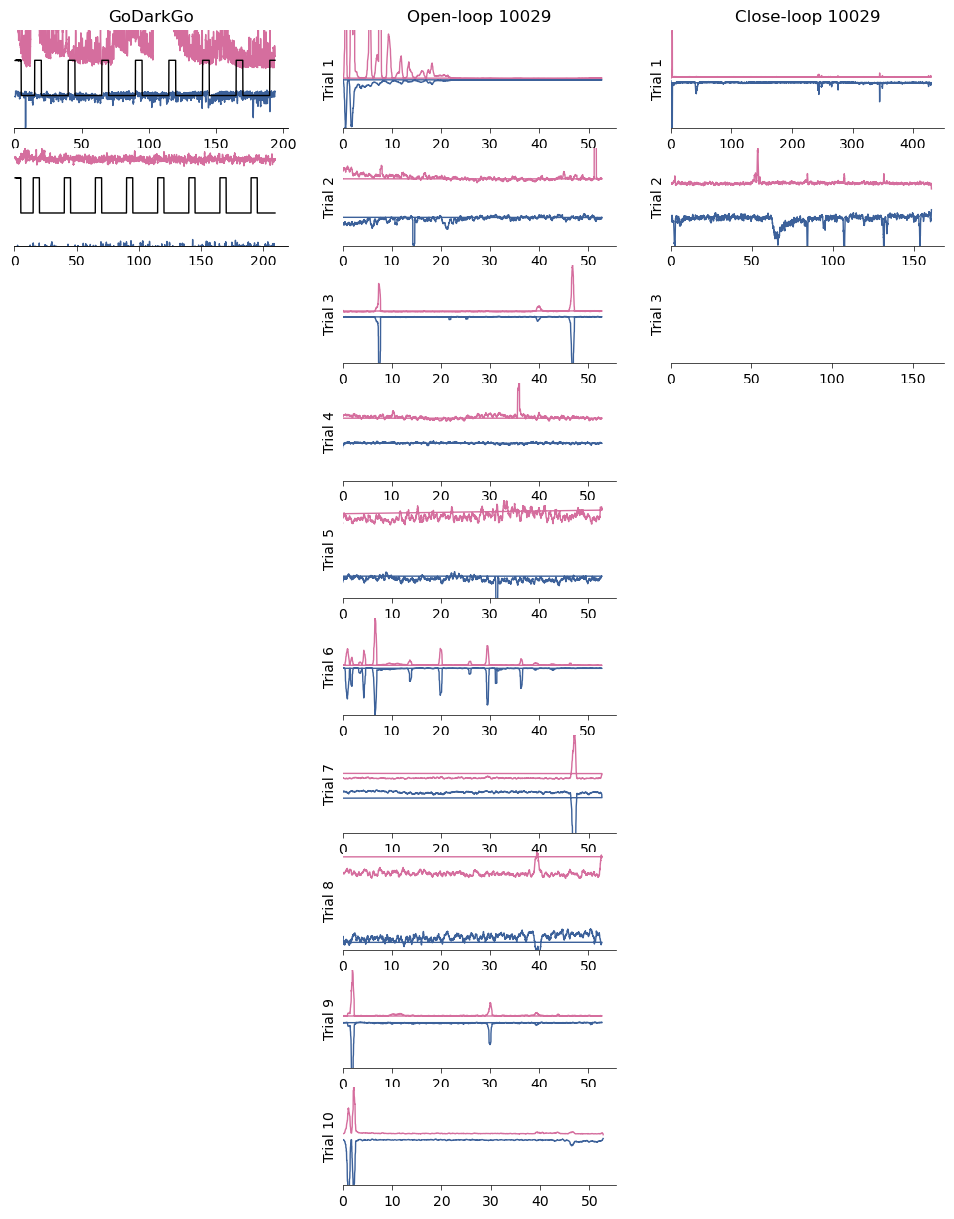

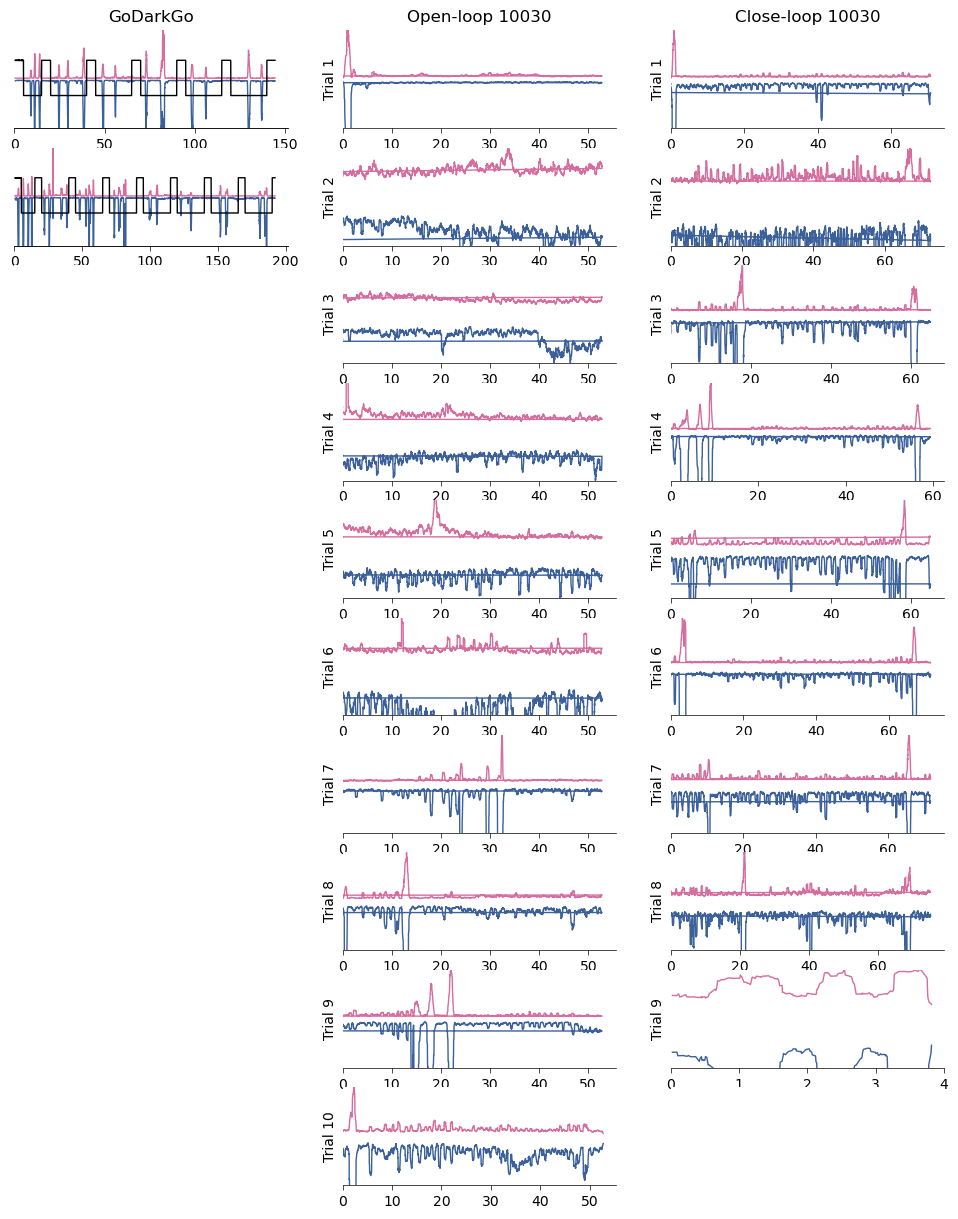

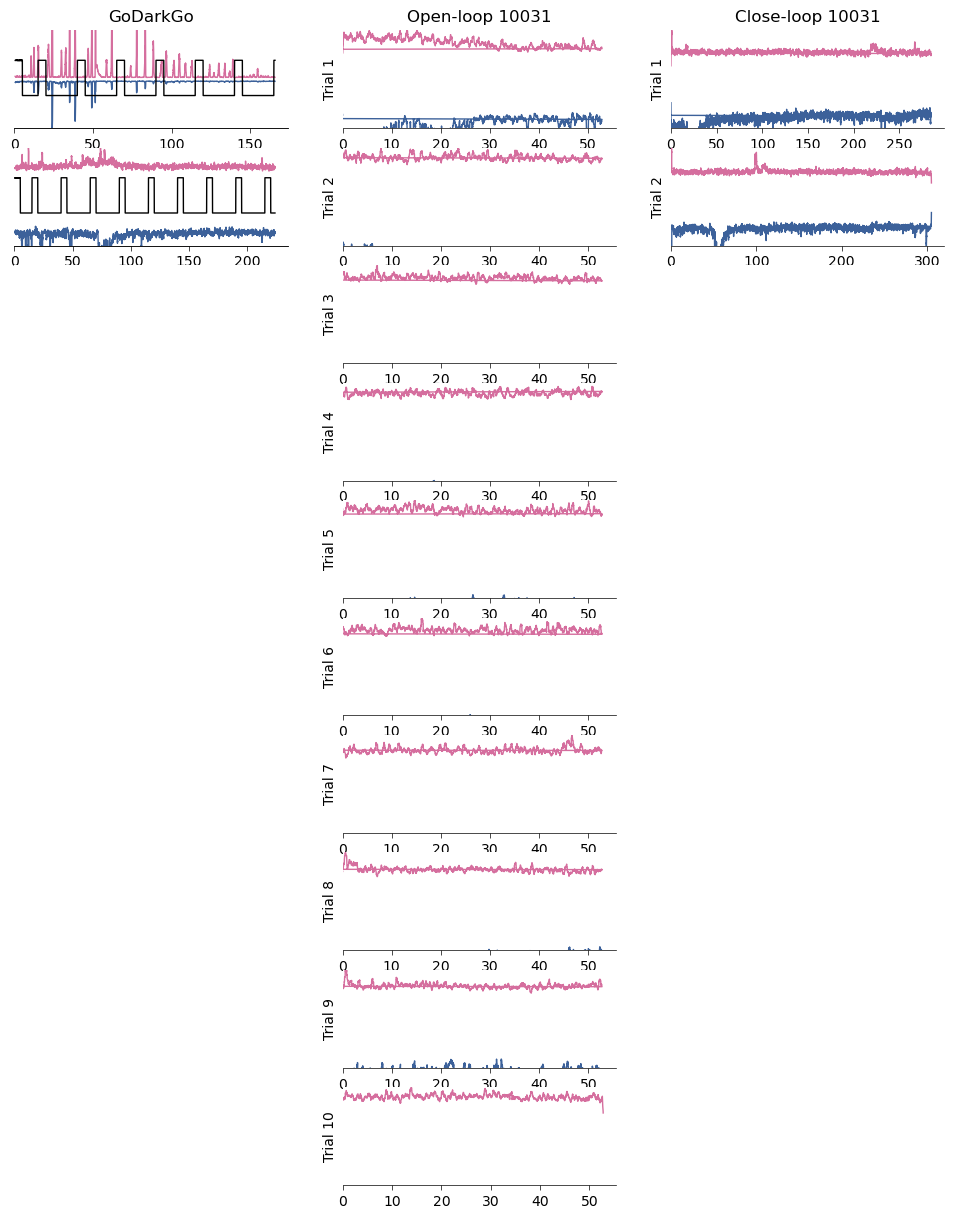

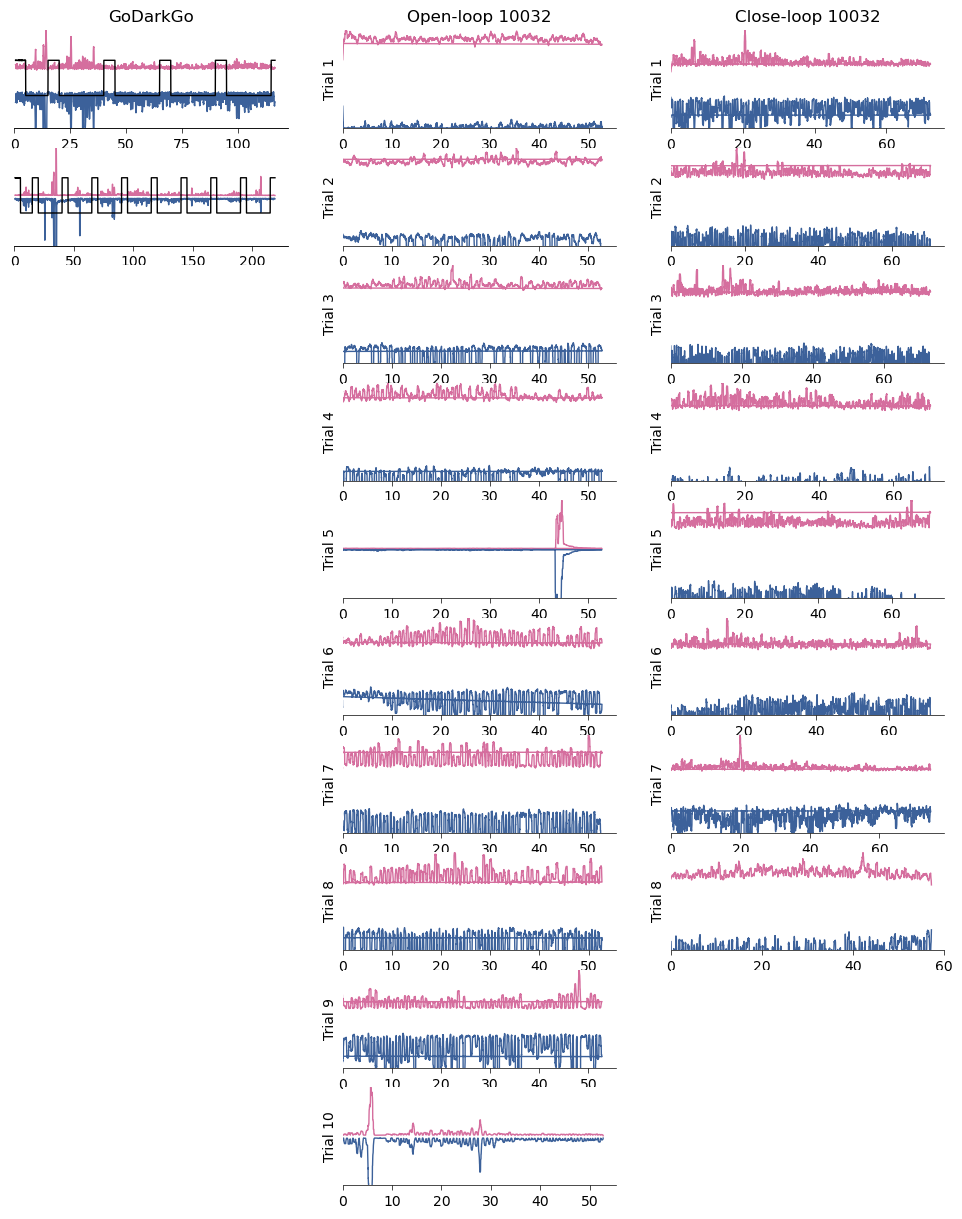

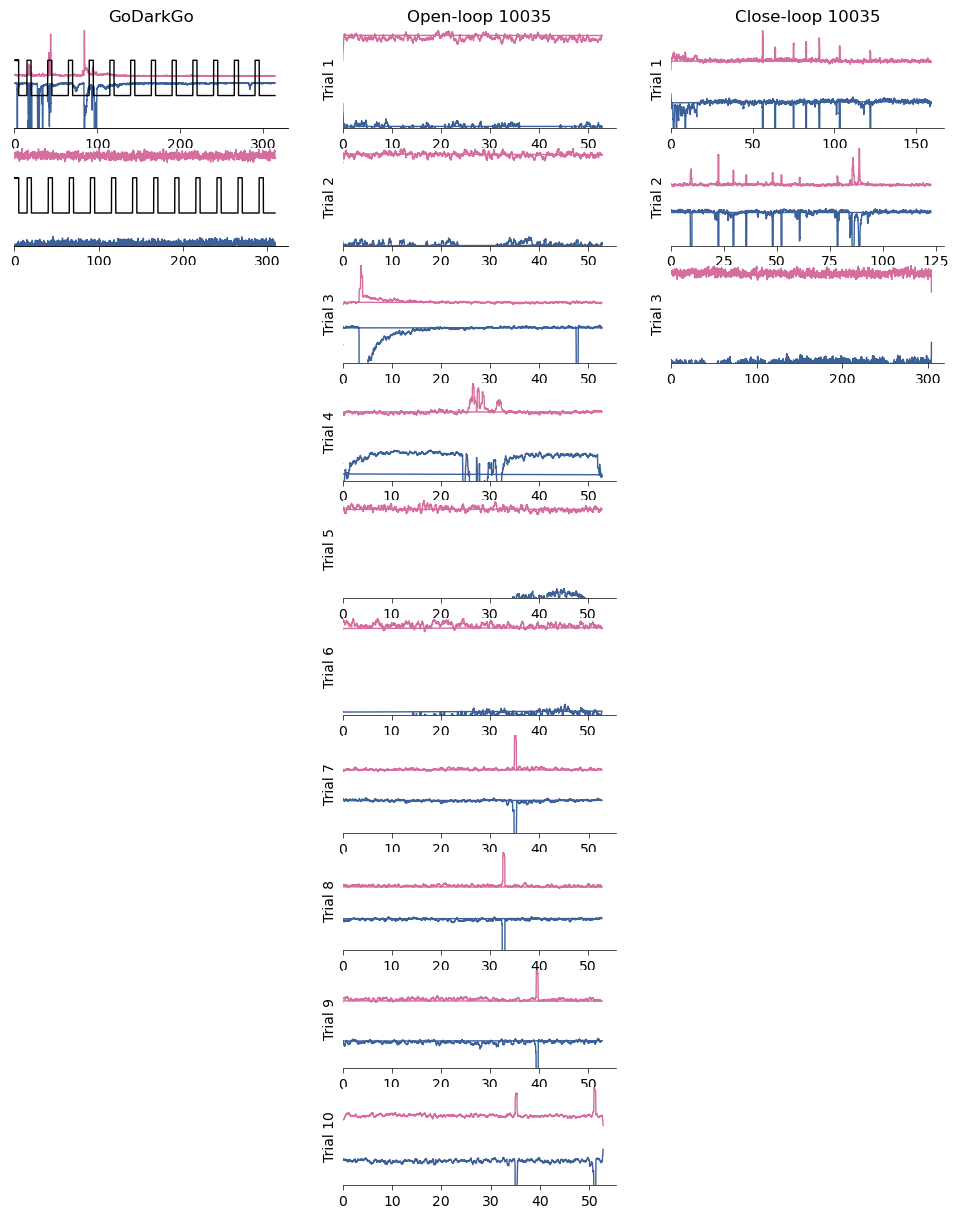

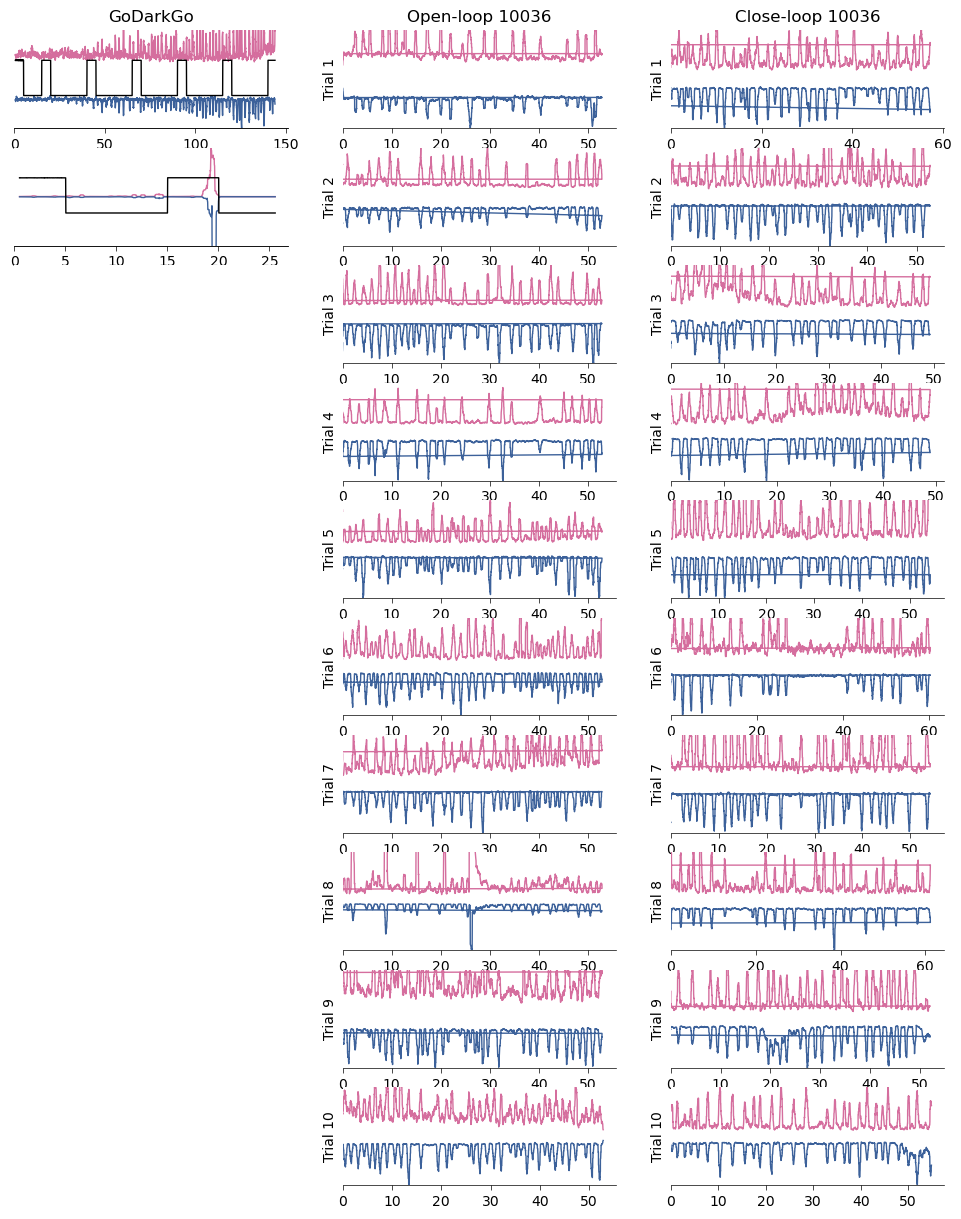

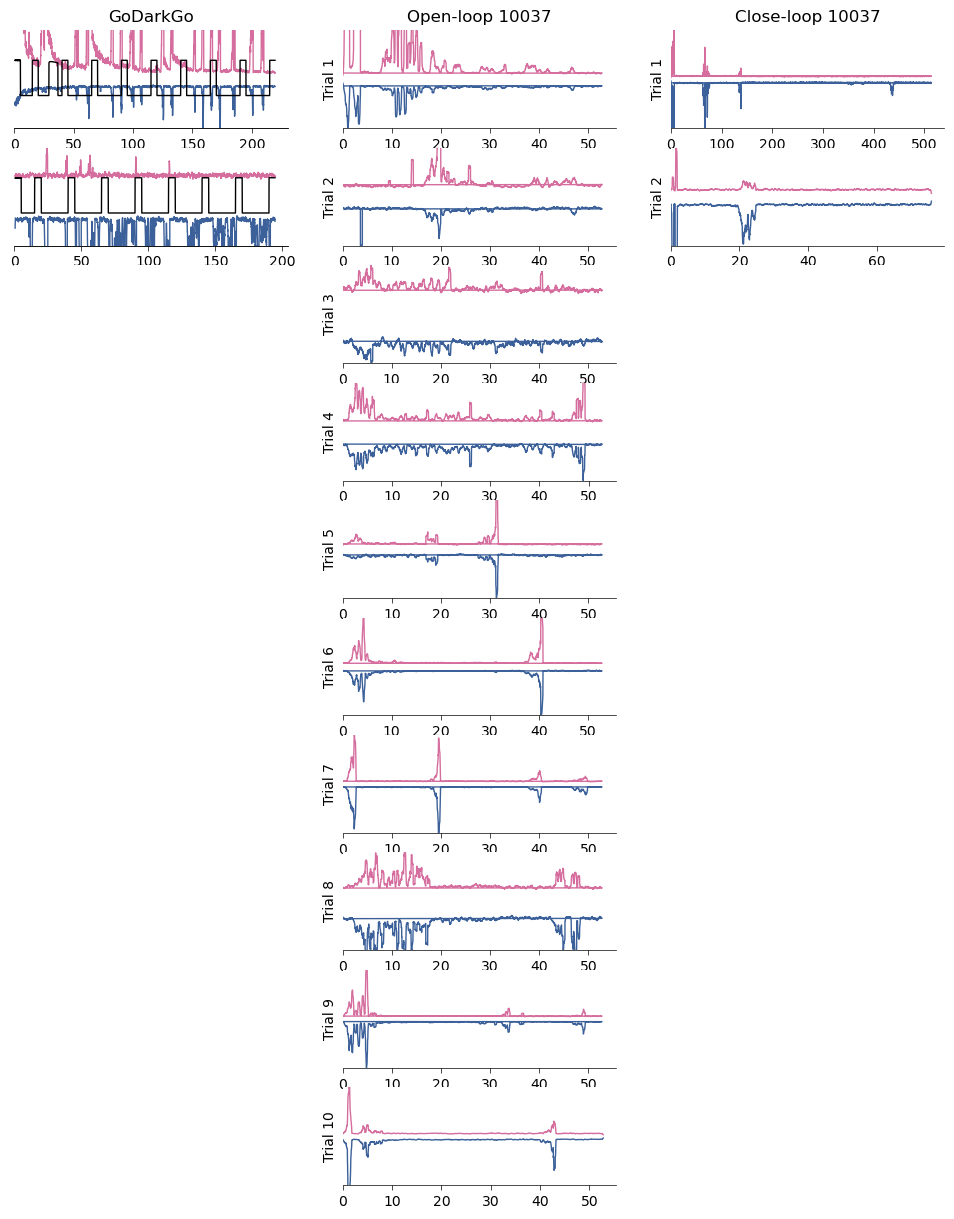

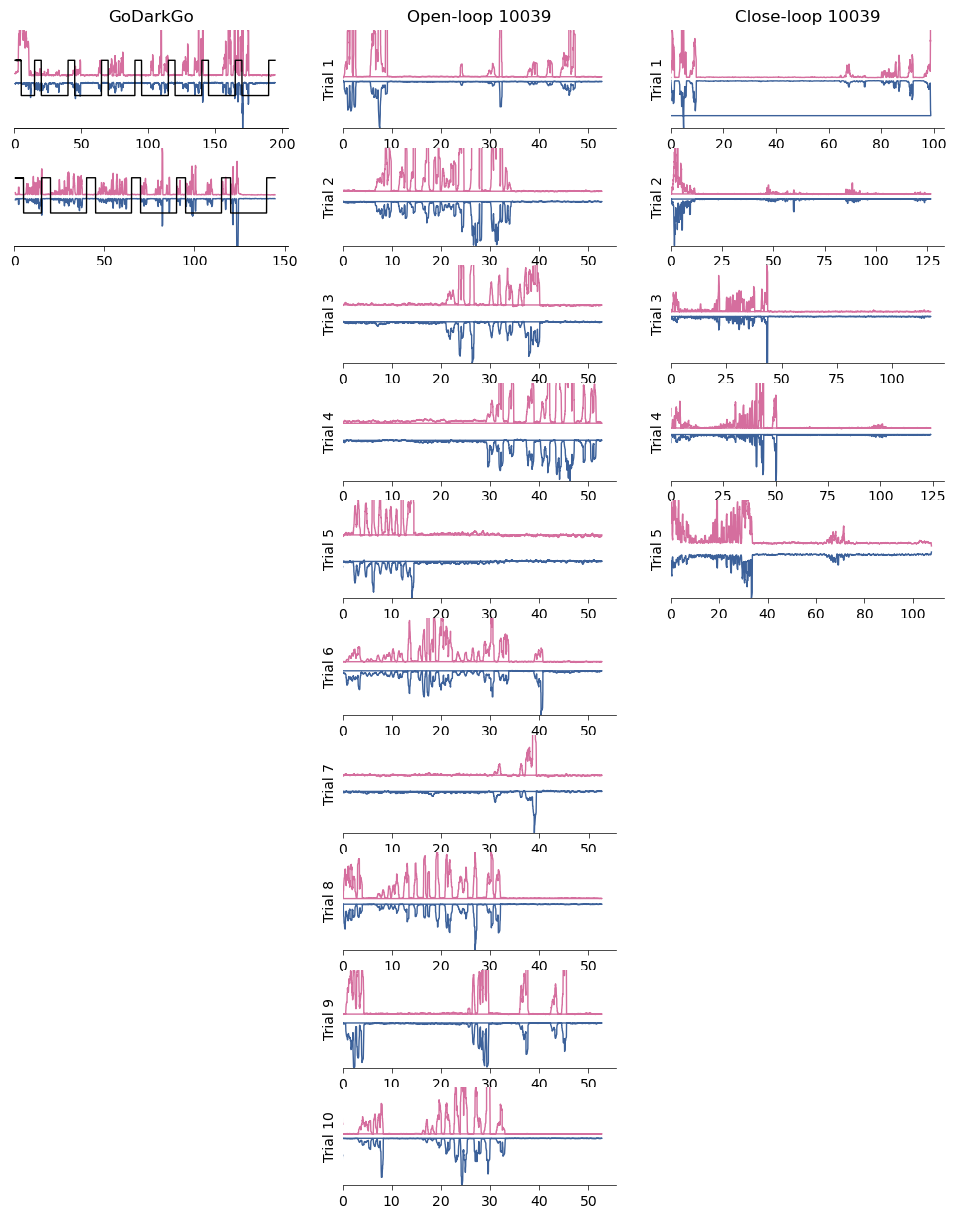

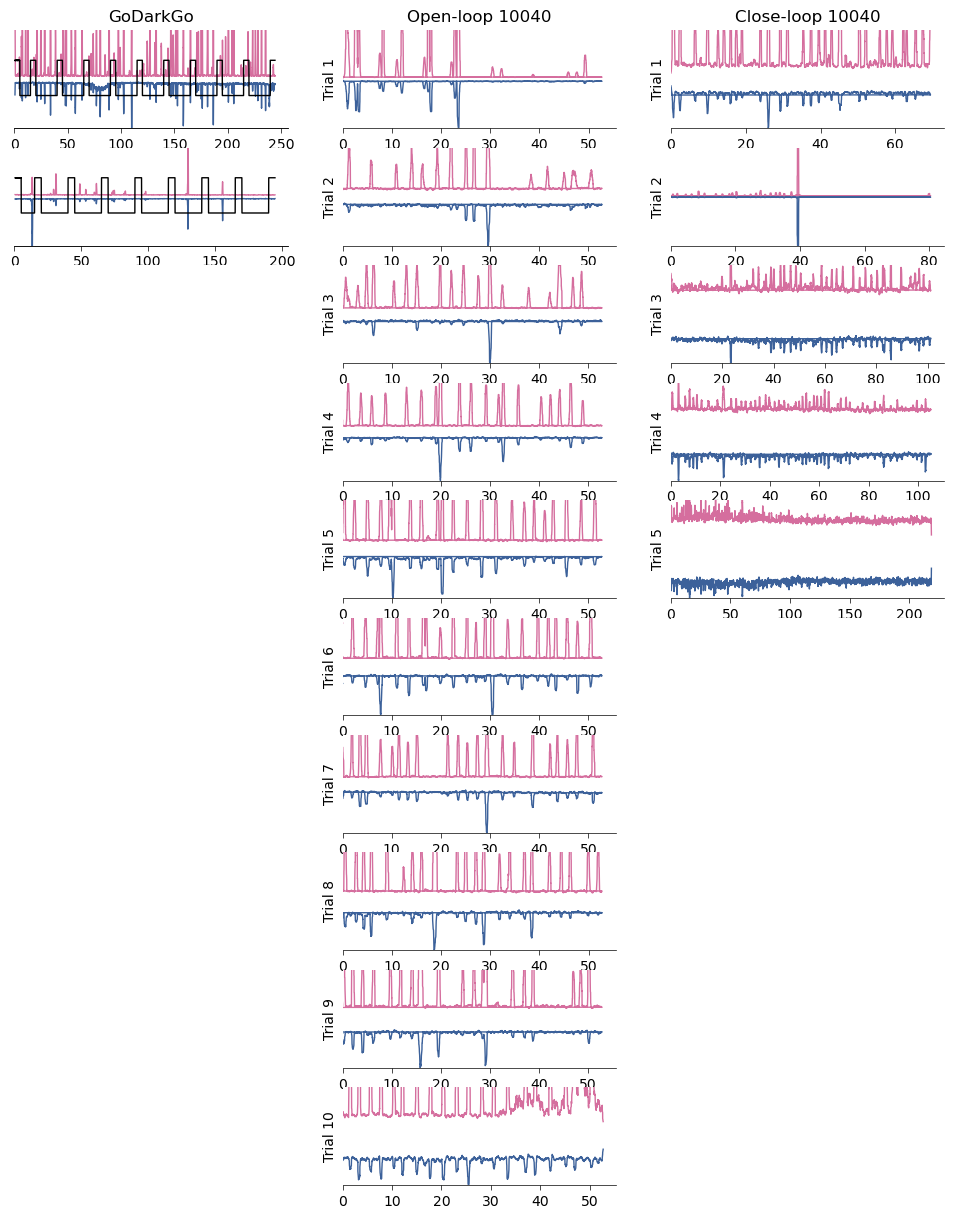

In [3]:
mkdir(join(loc, "Open-loop"))

def visualize_passive_navigation(fishID: int, ff: pd.DataFrame = f_formal):
    idxs = np.where((ff['ID'] == fishID) & (ff['session'] <= 4))[0]

    res = import12chFlt(ff['Ephys path'][idxs[0]])
    data = process_data(res)

    fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 15))
    ax0 = Clear_Axes(axes[0, 0], close_spines=['top', 'right', 'left'], ifxticks=True)
    ax1 = Clear_Axes(axes[1, 0], close_spines=['top', 'right', 'left'], ifxticks=True)
    for i in range(2, 10):
        ax = Clear_Axes(axes[i, 0])
    x = data['behav_pos'][25:-25]
    x[x < 0.5] = 0
    signal0 = np.convolve(data['fltCh0'], np.ones(20)/20, mode='same')[25:-25]
    signal1 = np.convolve(data['fltCh1'], np.ones(20)/20, mode='same')[25:-25]
    vmax = np.min([np.max(signal0), np.max(signal1)])
    
    ax0.plot(data['behav_time'][25:-25], signal0, c='#d56e9e', lw=1)
    ax0.plot(data['behav_time'][25:-25], -signal1, c='#3c619a', lw=1)
    ax0.set_title("GoDarkGo")
    axt0 = Clear_Axes(ax0.twinx(), close_spines=['top', 'right', 'left'], ifxticks=True)
    axt0.plot(data['behav_time'][25:-25], x, c='k', lw=1)
    axt0.set_ylim(-0.5, 1)
    ax0.set_ylim(-vmax, vmax)
    ax0.set_xlim(0, ax0.get_xlim()[1])
    
    res = import12chFlt(ff['Ephys path'][idxs[-1]])
    data = process_data(res)
    x = data['behav_pos'][25:-25]
    x[x < 0.5] = 0
    signal0 = np.convolve(data['fltCh0'], np.ones(20)/20, mode='same')[25:-25]
    signal1 = np.convolve(data['fltCh1'], np.ones(20)/20, mode='same')[25:-25]
    vmax = np.min([np.nanmax(signal0), np.nanmax(signal1)])
    ax1.plot(data['behav_time'][25:-25], signal0, c='#d56e9e', lw=1)
    ax1.plot(data['behav_time'][25:-25], -signal1, c='#3c619a', lw=1)
    axt1 = Clear_Axes(ax1.twinx(), close_spines=['top', 'right', 'left'], ifxticks=True)
    axt1.plot(data['behav_time'][25:-25], x, c='k', lw=1)
    axt1.set_ylim(-0.5, 1)
    ax1.set_ylim(-vmax, vmax)
    ax1.set_xlim(0, ax1.get_xlim()[1])
    ax1.set_xlabel("Time (s)")

    res = import12chFlt(ff['Ephys path'][idxs[1]])
    data = process_data(res)
    
    idx = np.where(data['behav_pos'][1:] < 10)[0][0] + 1
    for k in data.keys():
        data[k] = data[k][idx:]
    x_label = np.zeros_like(data['behav_pos'], np.int64)
    x_label[data['behav_pos'] < 32] = 1
    x_label[(data['behav_pos'] >= 32) & (data['behav_pos'] < 64)] = 2
    x_label[(data['behav_pos'] >= 64) & (data['behav_pos'] < 96)] = 3
    x_label[(data['behav_pos'] >= 96)] = 4
    
    idx = np.concatenate(([0], np.where(
        (np.diff(x_label) < 0) 
    )[0] + 1, [len(x_label)]))
    beg, end = idx[:-1], idx[1:]
    try:
        assert len(beg) == len(end) == 10, f"{beg}\n{end}"
    except:
        beg = beg[:10]
        end = end[:10]
    
    for i in range(10):
        ax = Clear_Axes(axes[i, 1], close_spines=['top', 'right', 'left'], ifxticks=True)
        if i == 0:
            ax.set_title(f"Open-loop {fishID}")
        
        x = data['behav_pos'][beg[i]:end[i]]
        signal0 = np.convolve(data['fltCh0'], np.ones(20)/20, mode='same')[beg[i]:end[i]]
        signal1 = np.convolve(data['fltCh1'], np.ones(20)/20, mode='same')[beg[i]:end[i]]
        vmax = np.min([np.nanmax(signal0), np.nanmax(signal1)])
        ax.plot(data['in_trial_time'][beg[i]:end[i]], signal0, c='#d56e9e', lw=1)
        ax.plot(data['in_trial_time'][beg[i]:end[i]], -signal1, c='#3c619a', lw=1)
        ax.set_ylim(-vmax, vmax)
        ax.set_ylabel(f"Trial {i+1}")
        ax.set_xlim(0, ax.get_xlim()[1])

    res = import12chFlt(ff['Ephys path'][idxs[2]])
    data = process_data(res)
    
    idx = np.where(data['behav_pos'][1:] < 10)[0][0] + 1
    for k in data.keys():
        data[k] = data[k][idx:]
    x_label = np.zeros_like(data['behav_pos'], np.int64)
    x_label[data['behav_pos'] < 32] = 1
    x_label[(data['behav_pos'] >= 32) & (data['behav_pos'] < 64)] = 2
    x_label[(data['behav_pos'] >= 64) & (data['behav_pos'] < 96)] = 3
    x_label[(data['behav_pos'] >= 96)] = 4
    
    idx = np.concatenate(([0], np.where(
        (np.diff(x_label) < 0) 
    )[0] + 1, [len(x_label)]))
    beg, end = idx[:-1], idx[1:]
    assert len(beg) == len(end)
    for i in range(10):
        if i < len(beg):
            ax = Clear_Axes(axes[i, 2], close_spines=['top', 'right', 'left'], ifxticks=True)
        else:
            ax = Clear_Axes(axes[i, 2])
            continue
        if i == 0:
            ax.set_title(f"Close-loop {fishID}")
        
        x = data['behav_pos'][beg[i]:end[i]]
        signal0 = np.convolve(data['fltCh0'], np.ones(20)/20, mode='same')[beg[i]:end[i]]
        signal1 = np.convolve(data['fltCh1'], np.ones(20)/20, mode='same')[beg[i]:end[i]]
        vmax = np.min([np.nanmax(signal0), np.nanmax(signal1)])
        ax.plot(data['in_trial_time'][beg[i]:end[i]], signal0, c='#d56e9e', lw=1)
        ax.plot(data['in_trial_time'][beg[i]:end[i]], -signal1, c='#3c619a', lw=1)
        ax.set_ylim(-vmax, vmax)
        ax.set_ylabel(f"Trial {i+1}")
        ax.set_xlim(0, ax.get_xlim()[1])

    plt.savefig(join(loc, "Open-loop", f"{fishID}_SwimPower.png"), dpi=600)
    plt.savefig(join(loc, "Open-loop", f"{fishID}_SwimPower.svg"), dpi=600)
    plt.show()

for fishID in np.unique(f_formal['ID']):
    visualize_passive_navigation(fishID)

# Close-loop

        D:\Yao Shuyang\En Lab\Results\5001 - Linear Track Swim Speed\Close-loop is made up successfully!


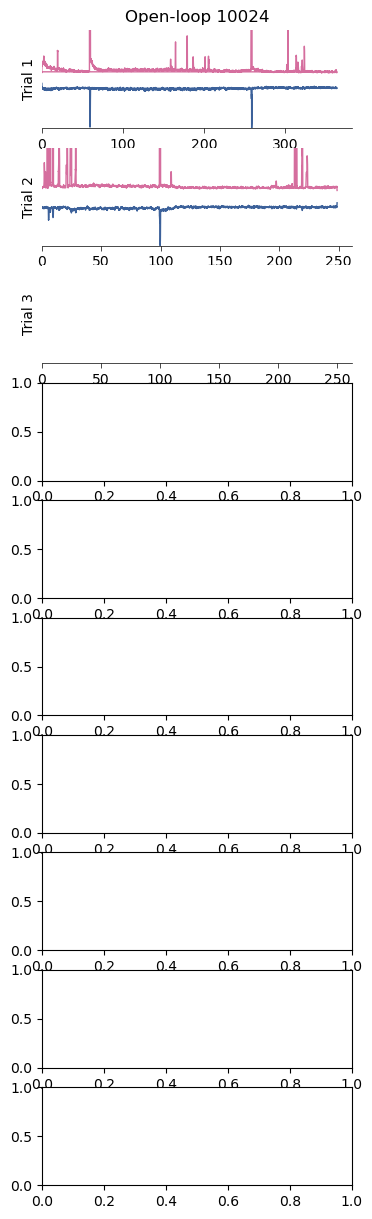

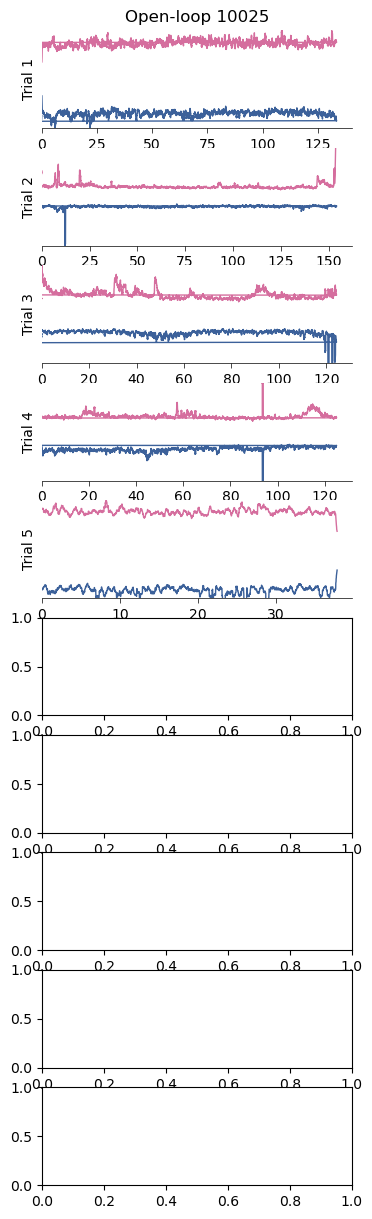

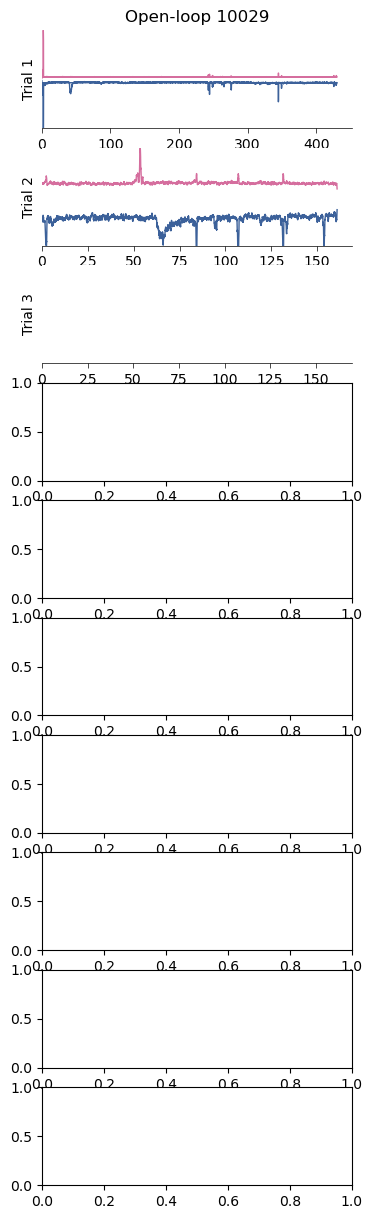

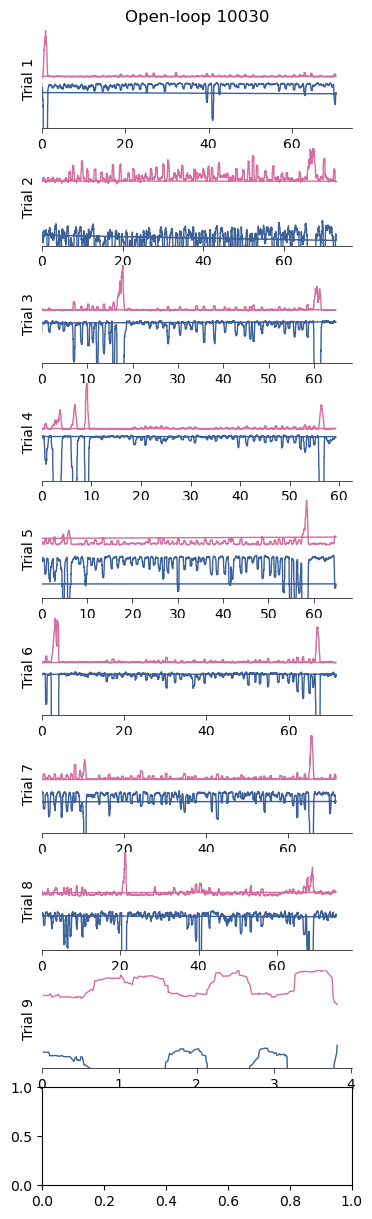

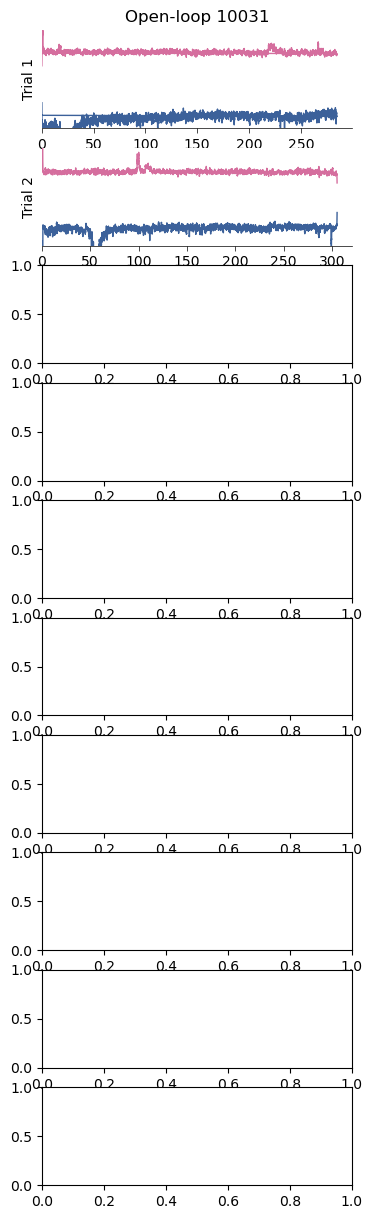

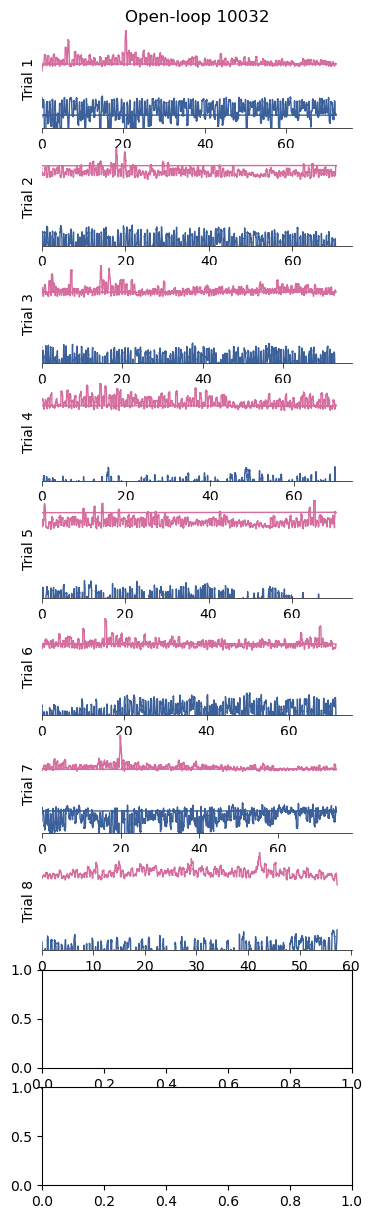

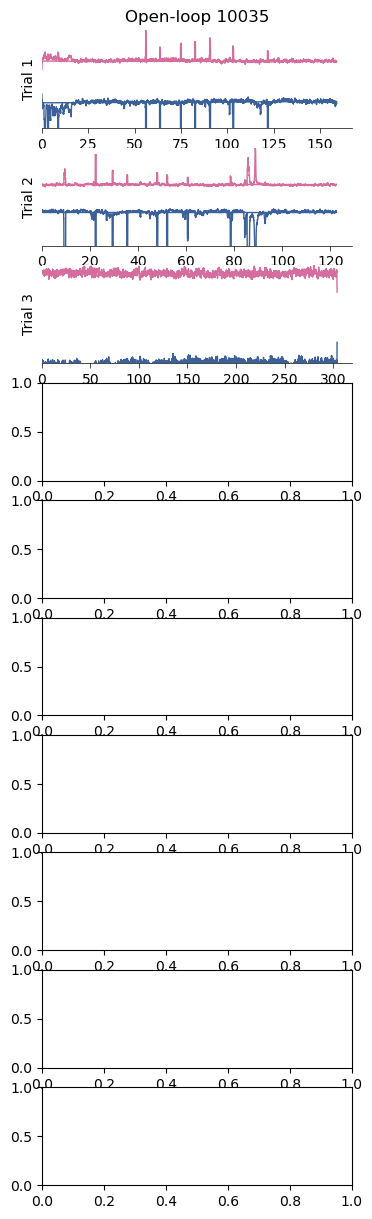

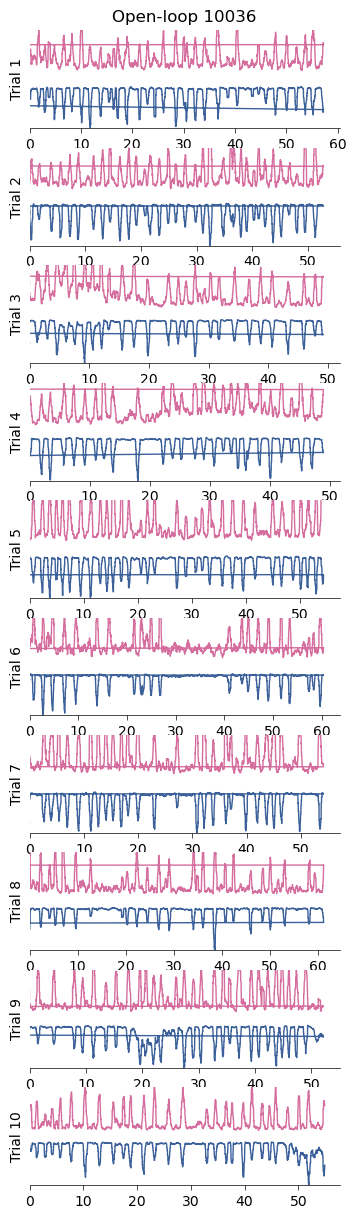

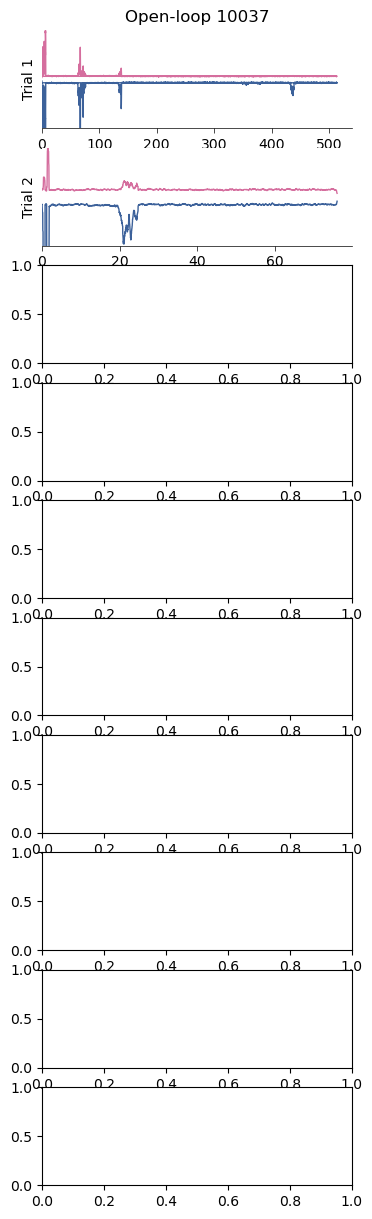

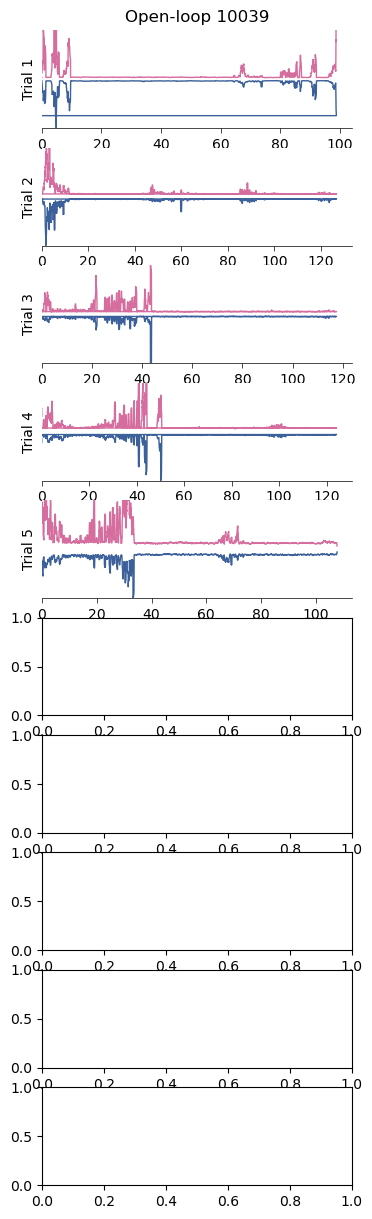

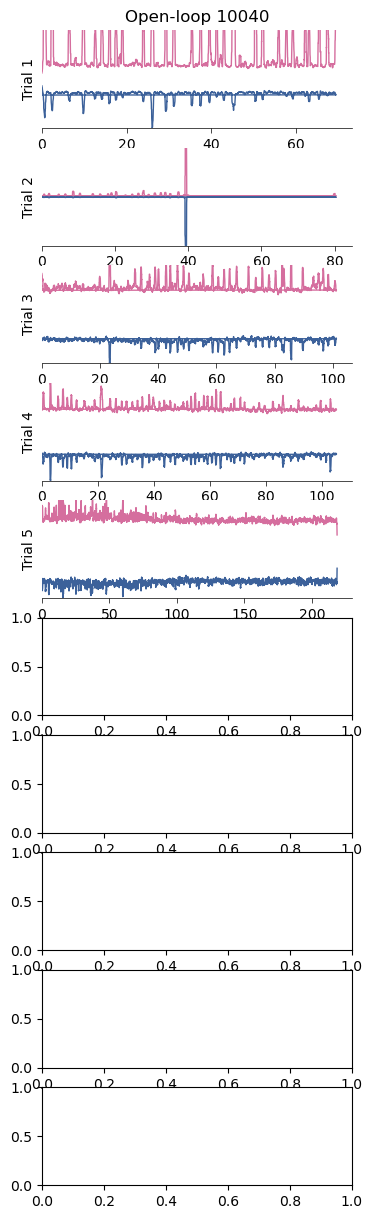

In [7]:
mkdir(join(loc, "Close-loop"))

def visualize_passive_navigation(fishID: int, ff: pd.DataFrame = f_formal):
    idxs = np.where((ff['ID'] == fishID) & (ff['session'] <= 4))[0]
    
    res = import12chFlt(ff['Ephys path'][idxs[2]])
    data = process_data(res)
    
    idx = np.where(data['behav_pos'][1:] < 10)[0][0] + 1
    for k in data.keys():
        data[k] = data[k][idx:]
    x_label = np.zeros_like(data['behav_pos'], np.int64)
    x_label[data['behav_pos'] < 32] = 1
    x_label[(data['behav_pos'] >= 32) & (data['behav_pos'] < 64)] = 2
    x_label[(data['behav_pos'] >= 64) & (data['behav_pos'] < 96)] = 3
    x_label[(data['behav_pos'] >= 96)] = 4
    
    idx = np.concatenate(([0], np.where(
        (np.diff(x_label) < 0) 
    )[0] + 1, [len(x_label)]))
    beg, end = idx[:-1], idx[1:]
    try:
        assert len(beg) == len(end), f"{beg}\n{end}"
    except:
        beg = beg[:10]
        end = end[:10]
    fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(4, 15))
    for i in range(len(beg)):
        ax = Clear_Axes(axes[i], close_spines=['top', 'right', 'left'], ifxticks=True)
        if i == 0:
            ax.set_title(f"Open-loop {fishID}")
        
        x = data['behav_pos'][beg[i]:end[i]]
        signal0 = np.convolve(data['fltCh0'], np.ones(20)/20, mode='same')[beg[i]:end[i]]
        signal1 = np.convolve(data['fltCh1'], np.ones(20)/20, mode='same')[beg[i]:end[i]]
        vmax = np.min([np.nanmax(signal0), np.nanmax(signal1)])
        ax.plot(data['in_trial_time'][beg[i]:end[i]], signal0, c='#d56e9e', lw=1)
        ax.plot(data['in_trial_time'][beg[i]:end[i]], -signal1, c='#3c619a', lw=1)
        ax.set_ylim(-vmax, vmax)
        ax.set_ylabel(f"Trial {i+1}")
        ax.set_xlim(0, ax.get_xlim()[1])

    plt.savefig(join(loc, "Open-loop", f"{fishID}_SwimPower.png"), dpi=600)
    plt.savefig(join(loc, "Open-loop", f"{fishID}_SwimPower.svg"), dpi=600)
    plt.show()

for fishID in np.unique(f_formal['ID']):
    visualize_passive_navigation(fishID)